STD Series: From 2.0 to 2.0
Generated 10000 samples for mean 0.62 and std 2.0, min: -5.38, max: 6.62
Generated 10000 input values for mean 0.62 and std 2.0
Generated 10000 cartesian products for mean 0.62 and std 2.0
Generated 10000 cartesian products in total
   Series1  Series2  Series3     Label
0  -5.3800     0.62      2.0  0.002216
1  -5.3788     0.62      2.0  0.002220
2  -5.3776     0.62      2.0  0.002224
3  -5.3764     0.62      2.0  0.002228
4  -5.3752     0.62      2.0  0.002232



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


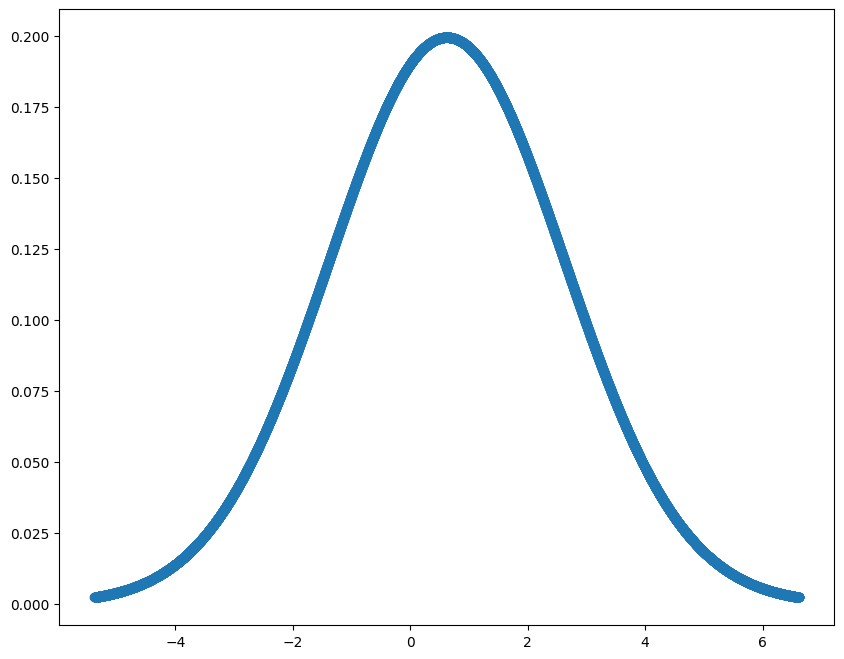

In [35]:
# Install necessary dependencies
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Step 1: Generate the series
num_values = 10000

std = np.linspace(2, 2, 1)
print(f"STD Series: From {std.min()} to {std.max()}")

# Mean Series: From -PI to +PI, just a wide range to shift the center of the curve to different locations.
mean = np.linspace(0.62, 0.543, 1)

# Now for each std and mean, we want to generate a set of 100 input values for each mean std pair, resulting in 100 * 100 * 100 = 1,000,000 input values in the end.
# We want input values to be distributed around the mean, with a maximum of 3 standard deviations away from the mean.
# Input values further away from the mean should be rarer, with more existing closer to the mean.
cartesian_product = []
for m, s in itertools.product(mean, std):
    # Generate Input values
    inputval = []
    # Maybe there is a better way than normal random samples to insure some low values are present, but this is a simple way
    samples = np.linspace(m - 3 * s, m + 3 * s, num_values)
    print(f"Generated {len(samples)} samples for mean {m} and std {s}, min: {samples.min()}, max: {samples.max()}")
    inputval.extend(samples)
    print(f"Generated {len(inputval)} input values for mean {m} and std {s}")
    # Make cartesian product for input values and m, s
    cartesian_product_input = list(itertools.product(inputval, [m], [s]))
    print(f"Generated {len(cartesian_product_input)} cartesian products for mean {m} and std {s}")
    cartesian_product.extend(cartesian_product_input)

print(f"Generated {len(cartesian_product)} cartesian products in total")

# Convert to a pandas DataFrame for better visualization
cartesian_df = pd.DataFrame(cartesian_product, columns=['Series1', 'Series2', 'Series3'])

# Step 3: Compute the labels using the Gaussian probability function
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

cartesian_df['Label'] = cartesian_df.apply(lambda row: gaussian_probability(row['Series1'], row['Series2'], row['Series3']), axis=1)


# Display the first few rows of the DataFrame with labels
print(cartesian_df.head())

# Step 4: Plot the results
fig = plt.figure(figsize=(10, 8))

# Extract Cartesian values for plotting
x = cartesian_df['Series1']
y = cartesian_df['Series2']
z = cartesian_df['Series3']
labels = cartesian_df['Label']

# 2D Scatter Plot between x and result
plt.scatter(x, labels)


(array([736., 474., 358., 292., 246., 216., 194., 174., 160., 148., 136.,
        130., 122., 116., 112., 104., 102.,  98.,  92.,  92.,  88.,  84.,
         84.,  80.,  78.,  76.,  76.,  74.,  70.,  72.,  68.,  68.,  68.,
         64.,  66.,  64.,  62.,  62.,  62.,  60.,  60.,  60.,  60.,  58.,
         58.,  58.,  56.,  56.,  58.,  56.,  54.,  56.,  56.,  54.,  56.,
         54.,  54.,  54.,  56.,  54.,  54.,  54.,  54.,  56.,  54.,  54.,
         56.,  54.,  56.,  56.,  56.,  56.,  58.,  56.,  58.,  58.,  60.,
         60.,  60.,  62.,  62.,  64.,  64.,  66.,  68.,  68.,  72.,  72.,
         76.,  78.,  82.,  86.,  92.,  96., 104., 116., 128., 152., 196.,
        470.]),
 array([0.00221592, 0.00418848, 0.00616103, 0.00813358, 0.01010613,
        0.01207868, 0.01405124, 0.01602379, 0.01799634, 0.01996889,
        0.02194144, 0.023914  , 0.02588655, 0.0278591 , 0.02983165,
        0.03180421, 0.03377676, 0.03574931, 0.03772186, 0.03969441,
        0.04166697, 0.04363952, 0.04561207, 0.

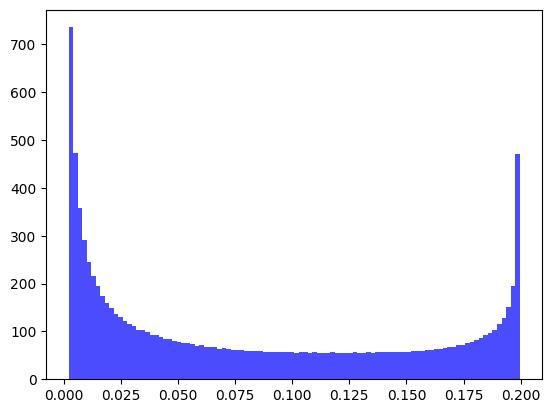

In [36]:
plt.hist(cartesian_df['Label'], bins=100, color='blue', alpha=0.7, label='Label Distribution')

In [37]:
# Do duplicate rows exist?
duplicates = cartesian_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [38]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(cartesian_df, test_size=0.2, train_size=0.8, random_state=42)


Train Data:
<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Series1  8000 non-null   float64
 1   Series2  8000 non-null   float64
 2   Series3  8000 non-null   float64
 3   Label    8000 non-null   float64
dtypes: float64(4)
memory usage: 312.5 KB
None

Test Data:
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 6252 to 6929
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Series1  2000 non-null   float64
 1   Series2  2000 non-null   float64
 2   Series3  2000 non-null   float64
 3   Label    2000 non-null   float64
dtypes: float64(4)
memory usage: 78.1 KB
None


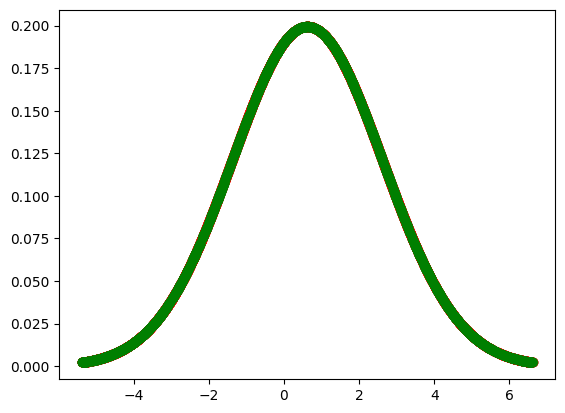

In [39]:
print("Train Data:")
print(train_df.info())
plt.scatter(train_df['Series1'], train_df['Label'], color='red', alpha=0.7, label='Train Data')

print("\nTest Data:")
print(test_df.info())
plt.scatter(test_df['Series1'], test_df['Label'], color='green', alpha=0.7, label='Test Data')


In [40]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class DataFrameDataset(Dataset):
    def __init__(self, dataframe):
        self.inputval = dataframe["Series1"]
        self.mean = dataframe["Series2"]
        self.std = dataframe["Series3"]
        self.labels = dataframe["Label"]

    def __len__(self):
        return len(self.inputval)

    def __getitem__(self, idx):
        inputval = self.inputval.iloc[idx]
        mean = self.mean.iloc[idx]
        std = self.std.iloc[idx]
        labels = self.labels.iloc[idx]
        return inputval, mean, std, labels
    
# Create the datasets
train_dataset = DataFrameDataset(train_df)
test_dataset = DataFrameDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)


In [41]:
import torch.nn as nn
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [42]:
import torch

TRAINING_PREFIX = "Largerer_dropout_new_data"

ann = nn.Sequential(
    nn.Linear(1, 128),  # Input layer: 3 features (mu, sigma, x)
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(128, 256),  # first hidden layer
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(256, 128),  # second hidden layer
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(128, 1)    # Output layer: single value for f(x; mu, sigma)
)

#ann.load_state_dict(torch.load("largerer_ann_new_data4.pth"))

ann.to(device)

total_params = sum(p.numel() for p in ann.parameters() if p.requires_grad)
print(f"Total Parameters: {total_params}")


Total Parameters: 66305


In [43]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import plotly.graph_objects as go
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import display
from torcheval.metrics import R2Score


def create_loss_plot():
    fig = go.FigureWidget()
    fig.add_trace(go.Scatter(x=[], y=[], mode='lines', name='Train Loss', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=[], y=[], mode='lines', name='Eval Loss', line=dict(color='orange')))

    # Configure layout
    fig.update_layout(title='Training and Evaluation Losses',
                    xaxis_title='Epoch',
                    yaxis_title='Loss',
                    template='plotly_dark')

    # Display the figure widget
    display(fig)
    return fig

def update_loss_plot(fig, train_loss, eval_loss):
    with fig.batch_update():
        fig.data[0].x = list(range(len(train_loss)))
        fig.data[0].y = train_loss
        fig.data[1].x = list(range(len(eval_loss)))
        fig.data[1].y = eval_loss

import numpy as np
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

from tqdm.auto import tqdm
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

def do_epoch(loader, model, optimizer, device, n_epochs: int, current_epoch: int, train: bool = False,):
    if train:
        model.train()
    else:
        model.eval()
    epoch_loss = 0
    metric = R2Score(device=device)
    for inputvals, means, stds, labels in tqdm(loader, desc=f"{'Epoch' if train else 'Eval Epoch'} {current_epoch+1}/{n_epochs}"):
        inputs = inputvals.unsqueeze(1).float()
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        metric.update(outputs.squeeze(), labels)
        if train:
            optimizer.zero_grad()
            loss = F.mse_loss(outputs.squeeze(), labels.float())
            loss.backward()
            optimizer.step()
        else:
            loss = F.mse_loss(outputs.squeeze(), labels.float())
        epoch_loss += loss.item()
    return epoch_loss, metric.compute()

In [44]:
ann.train()

N_EPOCHS = 100
LR = 1e-4

# Create subfolder for this loop
import os
import shutil

if os.path.exists(f"./results/{TRAINING_PREFIX}"):
    shutil.rmtree(f"./results/{TRAINING_PREFIX}")
os.makedirs(f"./results/{TRAINING_PREFIX}")

optim = torch.optim.Adam(ann.parameters(), lr=LR)

last_loss = 0
last_eval_loss = 0

epoch_loss_list = []
eval_loss_list = [] 

fig = create_loss_plot()

for epoch in range(N_EPOCHS):
    epoch_loss, train_R2_score = do_epoch(train_loader, ann, optim, device, n_epochs=N_EPOCHS, current_epoch=epoch, train=True)
    eval_epoch_loss, eval_R2_score = do_epoch(test_loader, ann, None, device, n_epochs=N_EPOCHS, current_epoch=epoch, train=False)
    eval_loss_list.append(eval_epoch_loss/len(test_loader))
    print(f"Epoch {epoch+1}, Train Loss: {epoch_loss/len(train_loader)}, Diff: {epoch_loss/len(train_loader) - last_loss}, Eval Loss: {eval_epoch_loss/len(test_loader)}, Diff Eval: {eval_epoch_loss/len(test_loader) - last_eval_loss}, Train R2 Score: {train_R2_score}, Eval R2 Score: {eval_R2_score}")
    last_loss = epoch_loss/len(train_loader)
    last_eval_loss = eval_epoch_loss/len(test_loader)
    epoch_loss_list.append(epoch_loss/len(train_loader))
    update_loss_plot(fig, epoch_loss_list, eval_loss_list)

FigureWidget({
    'data': [{'line': {'color': 'blue'},
              'mode': 'lines',
              'name': 'Train Loss',
              'type': 'scatter',
              'uid': 'be01aff2-4285-44be-8610-ddf71fcea36f',
              'x': [],
              'y': []},
             {'line': {'color': 'orange'},
              'mode': 'lines',
              'name': 'Eval Loss',
              'type': 'scatter',
              'uid': '7541adcb-6ed7-4cfb-bc5c-85dc61404493',
              'x': [],
              'y': []}],
    'layout': {'template': '...',
               'title': {'text': 'Training and Evaluation Losses'},
               'xaxis': {'title': {'text': 'Epoch'}},
               'yaxis': {'title': {'text': 'Loss'}}}
})

Epoch 1/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 1/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 1, Train Loss: 0.003486415939813014, Diff: 0.003486415939813014, Eval Loss: 0.00033881459117401393, Diff Eval: 0.00033881459117401393, Train R2 Score: 0.28267842531204224, Eval R2 Score: 0.9293062090873718


Epoch 2/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 2/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 2, Train Loss: 0.0008016484489489813, Diff: -0.002684767490864033, Eval Loss: 0.00010414571093861013, Diff Eval: -0.0002346688802354038, Train R2 Score: 0.8350630402565002, Eval R2 Score: 0.9782699346542358


Epoch 3/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 3/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 3, Train Loss: 0.0004792468203086173, Diff: -0.00032240162864036393, Eval Loss: 5.258264006624813e-05, Diff Eval: -5.1563070872362e-05, Train R2 Score: 0.9013962745666504, Eval R2 Score: 0.9890286326408386


Epoch 4/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 4/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 4, Train Loss: 0.00032289134776510763, Diff: -0.0001563554725435097, Eval Loss: 0.00011916575083159842, Diff Eval: 6.658311076535028e-05, Train R2 Score: 0.9335659742355347, Eval R2 Score: 0.9751360416412354


Epoch 5/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 5/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 5, Train Loss: 0.000251580768279382, Diff: -7.131057948572562e-05, Eval Loss: 6.635927932802587e-05, Diff Eval: -5.280647150357255e-05, Train R2 Score: 0.9482381343841553, Eval R2 Score: 0.9861540794372559


Epoch 6/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 6/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 6, Train Loss: 0.00019990789599251, Diff: -5.1672872286871995e-05, Eval Loss: 3.7524377323279624e-05, Diff Eval: -2.8834902004746247e-05, Train R2 Score: 0.9588695168495178, Eval R2 Score: 0.992170512676239


Epoch 7/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 7/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 7, Train Loss: 0.00016223745080060325, Diff: -3.767044519190676e-05, Eval Loss: 2.5143173901597037e-05, Diff Eval: -1.2381203421682587e-05, Train R2 Score: 0.966620147228241, Eval R2 Score: 0.9947538375854492


Epoch 8/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 8/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 8, Train Loss: 0.00014067794349830365, Diff: -2.1559507302299603e-05, Eval Loss: 2.9520998818043155e-05, Diff Eval: 4.377824916446118e-06, Train R2 Score: 0.9710558652877808, Eval R2 Score: 0.9938404560089111


Epoch 9/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 9/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 9, Train Loss: 0.00012194013446423924, Diff: -1.8737809034064413e-05, Eval Loss: 3.2867184359929526e-05, Diff Eval: 3.346185541886371e-06, Train R2 Score: 0.9749112129211426, Eval R2 Score: 0.9931422472000122


Epoch 10/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 10/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 10, Train Loss: 0.00010476385336733074, Diff: -1.71762810969085e-05, Eval Loss: 2.7884372320841068e-05, Diff Eval: -4.982812039088458e-06, Train R2 Score: 0.9784451127052307, Eval R2 Score: 0.9941819310188293


Epoch 11/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 11/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 11, Train Loss: 9.960864973254501e-05, Diff: -5.155203634785724e-06, Eval Loss: 2.115438730106689e-05, Diff Eval: -6.729985019774178e-06, Train R2 Score: 0.9795058369636536, Eval R2 Score: 0.995586097240448


Epoch 12/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 12/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 12, Train Loss: 9.1780908198416e-05, Diff: -7.827741534129014e-06, Eval Loss: 2.4667713420058136e-05, Diff Eval: 3.513326118991246e-06, Train R2 Score: 0.9811163544654846, Eval R2 Score: 0.9948530793190002


Epoch 13/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 13/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 13, Train Loss: 8.16511274642835e-05, Diff: -1.0129780734132506e-05, Eval Loss: 2.2113992828963092e-05, Diff Eval: -2.5537205910950443e-06, Train R2 Score: 0.9832005500793457, Eval R2 Score: 0.9953858852386475


Epoch 14/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 14/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 14, Train Loss: 7.908519493503263e-05, Diff: -2.5659325292508675e-06, Eval Loss: 1.906518673786195e-05, Diff Eval: -3.0488060911011413e-06, Train R2 Score: 0.9837284684181213, Eval R2 Score: 0.9960220456123352


Epoch 15/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 15/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 15, Train Loss: 7.24488772029872e-05, Diff: -6.636317732045422e-06, Eval Loss: 2.4701139958779093e-05, Diff Eval: 5.635953220917143e-06, Train R2 Score: 0.9850938320159912, Eval R2 Score: 0.9948461055755615


Epoch 16/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 16/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 16, Train Loss: 6.768990302953171e-05, Diff: -4.758974173455497e-06, Eval Loss: 2.5418151592020877e-05, Diff Eval: 7.170116332417841e-07, Train R2 Score: 0.9860729575157166, Eval R2 Score: 0.9946964979171753


Epoch 17/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 17/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 17, Train Loss: 6.678333406307501e-05, Diff: -9.065689664566933e-07, Eval Loss: 3.3427997863327616e-05, Diff Eval: 8.009846271306738e-06, Train R2 Score: 0.9862595200538635, Eval R2 Score: 0.9930252432823181


Epoch 18/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 18/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 18, Train Loss: 6.0420645069825695e-05, Diff: -6.362688993249319e-06, Eval Loss: 3.335026997956447e-05, Diff Eval: -7.772788376314338e-08, Train R2 Score: 0.9875686168670654, Eval R2 Score: 0.993041455745697


Epoch 19/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 19/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 19, Train Loss: 6.116549974649388e-05, Diff: 7.448546766681817e-07, Eval Loss: 4.2458270690985956e-05, Diff Eval: 9.108000711421483e-06, Train R2 Score: 0.9874153733253479, Eval R2 Score: 0.9911410808563232


Epoch 20/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 20/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 20, Train Loss: 5.761499411346449e-05, Diff: -3.5505056330293884e-06, Eval Loss: 4.4853386731119824e-05, Diff Eval: 2.3951160401338684e-06, Train R2 Score: 0.9881458878517151, Eval R2 Score: 0.9906413555145264


Epoch 21/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 21/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 21, Train Loss: 5.5317868309430196e-05, Diff: -2.2971258040342926e-06, Eval Loss: 2.602226922317641e-05, Diff Eval: -1.8831117507943415e-05, Train R2 Score: 0.9886184930801392, Eval R2 Score: 0.9945704340934753


Epoch 22/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 22/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 22, Train Loss: 5.539894012144941e-05, Diff: 8.10718120192164e-08, Eval Loss: 3.085355531220557e-05, Diff Eval: 4.831286089029164e-06, Train R2 Score: 0.988601803779602, Eval R2 Score: 0.9935624003410339


Epoch 23/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 23/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 23, Train Loss: 5.0554105966512e-05, Diff: -4.8448341549374145e-06, Eval Loss: 3.019583554851124e-05, Diff Eval: -6.577197636943318e-07, Train R2 Score: 0.9895986318588257, Eval R2 Score: 0.9936996102333069


Epoch 24/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 24/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 24, Train Loss: 5.021713870701205e-05, Diff: -3.369672594999445e-07, Eval Loss: 2.1697776501241605e-05, Diff Eval: -8.498059047269636e-06, Train R2 Score: 0.9896679520606995, Eval R2 Score: 0.9954727292060852


Epoch 25/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 25/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 25, Train Loss: 4.887892749684397e-05, Diff: -1.3382112101680818e-06, Eval Loss: 1.8162498137826334e-05, Diff Eval: -3.535278363415271e-06, Train R2 Score: 0.9899433255195618, Eval R2 Score: 0.9962103962898254


Epoch 26/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 26/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 26, Train Loss: 4.79484937604866e-05, Diff: -9.3043373635737e-07, Eval Loss: 1.9686149862536695e-05, Diff Eval: 1.523651724710361e-06, Train R2 Score: 0.9901347160339355, Eval R2 Score: 0.9958924651145935


Epoch 27/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 27/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 27, Train Loss: 4.6408181730839714e-05, Diff: -1.5403120296468873e-06, Eval Loss: 4.981971552479081e-05, Diff Eval: 3.0133565662254116e-05, Train R2 Score: 0.9904516935348511, Eval R2 Score: 0.9896050691604614


Epoch 28/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 28/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 28, Train Loss: 4.6097295100480554e-05, Diff: -3.1088663035916045e-07, Eval Loss: 2.479394407419022e-05, Diff Eval: -2.502577145060059e-05, Train R2 Score: 0.9905155897140503, Eval R2 Score: 0.9948267340660095


Epoch 29/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 29/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 29, Train Loss: 4.331495608039404e-05, Diff: -2.7823390200865144e-06, Eval Loss: 2.9218368108558935e-05, Diff Eval: 4.424424034368714e-06, Train R2 Score: 0.9910880923271179, Eval R2 Score: 0.9939035773277283


Epoch 30/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 30/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 30, Train Loss: 4.427743853193533e-05, Diff: 9.62482451541291e-07, Eval Loss: 1.9601829757448285e-05, Diff Eval: -9.61653835111065e-06, Train R2 Score: 0.9908900856971741, Eval R2 Score: 0.9959100484848022


Epoch 31/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 31/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 31, Train Loss: 4.2119234187339315e-05, Diff: -2.158204344596015e-06, Eval Loss: 3.1320092966780065e-05, Diff Eval: 1.171826320933178e-05, Train R2 Score: 0.991334080696106, Eval R2 Score: 0.9934650659561157


Epoch 32/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 32/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 32, Train Loss: 4.058137071751844e-05, Diff: -1.5378634698208745e-06, Eval Loss: 1.6844407342432534e-05, Diff Eval: -1.4475685624347531e-05, Train R2 Score: 0.9916505217552185, Eval R2 Score: 0.9964854121208191


Epoch 33/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 33/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 33, Train Loss: 4.1719549606568764e-05, Diff: 1.1381788890503234e-06, Eval Loss: 3.417871889541857e-05, Diff Eval: 1.7334311552986033e-05, Train R2 Score: 0.991416335105896, Eval R2 Score: 0.9928686022758484


Epoch 34/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 34/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 34, Train Loss: 3.9563191534398355e-05, Diff: -2.1563580721704092e-06, Eval Loss: 3.0430111488385593e-05, Diff Eval: -3.7486074070329744e-06, Train R2 Score: 0.9918599724769592, Eval R2 Score: 0.9936507344245911


Epoch 35/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 35/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 35, Train Loss: 3.760736202821136e-05, Diff: -1.955829506186996e-06, Eval Loss: 3.1971077449270524e-05, Diff Eval: 1.5409659608849312e-06, Train R2 Score: 0.9922623634338379, Eval R2 Score: 0.9933292269706726


Epoch 36/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 36/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 36, Train Loss: 3.7129426887986484e-05, Diff: -4.779351402248747e-07, Eval Loss: 4.0420418023131785e-05, Diff Eval: 8.44934057386126e-06, Train R2 Score: 0.9923607707023621, Eval R2 Score: 0.9915662407875061


Epoch 37/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 37/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 37, Train Loss: 3.7483992276975187e-05, Diff: 3.545653889887028e-07, Eval Loss: 3.22612779418705e-05, Diff Eval: -8.159140081261282e-06, Train R2 Score: 0.992287814617157, Eval R2 Score: 0.9932686686515808


Epoch 38/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 38/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 38, Train Loss: 3.712674419057294e-05, Diff: -3.572480864022482e-07, Eval Loss: 3.932570939650759e-05, Diff Eval: 7.064431454637085e-06, Train R2 Score: 0.992361307144165, Eval R2 Score: 0.9917946457862854


Epoch 39/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 39/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 39, Train Loss: 3.718856996238173e-05, Diff: 6.18257718087932e-08, Eval Loss: 2.3169946485722904e-05, Diff Eval: -1.6155762910784684e-05, Train R2 Score: 0.9923485517501831, Eval R2 Score: 0.9951655864715576


Epoch 40/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 40/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 40, Train Loss: 3.5255505901659486e-05, Diff: -1.9330640607222453e-06, Eval Loss: 3.155987267382443e-05, Diff Eval: 8.389926188101528e-06, Train R2 Score: 0.9927462935447693, Eval R2 Score: 0.9934149980545044


Epoch 41/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 41/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 41, Train Loss: 3.513572288829891e-05, Diff: -1.1978301336057452e-07, Eval Loss: 2.2381388516805602e-05, Diff Eval: -9.17848415701883e-06, Train R2 Score: 0.9927709698677063, Eval R2 Score: 0.9953300952911377


Epoch 42/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 42/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 42, Train Loss: 3.498778725406737e-05, Diff: -1.4793563423154003e-07, Eval Loss: 3.0350402972544543e-05, Diff Eval: 7.969014455738941e-06, Train R2 Score: 0.9928013682365417, Eval R2 Score: 0.9936673641204834


Epoch 43/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 43/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 43, Train Loss: 3.394683029910084e-05, Diff: -1.0409569549665326e-06, Eval Loss: 3.290648604161106e-05, Diff Eval: 2.5560830690665152e-06, Train R2 Score: 0.9930155277252197, Eval R2 Score: 0.9931340217590332


Epoch 44/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 44/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 44, Train Loss: 3.3017045318047166e-05, Diff: -9.297849810536735e-07, Eval Loss: 1.3944457212346605e-05, Diff Eval: -1.8962028829264455e-05, Train R2 Score: 0.9932068586349487, Eval R2 Score: 0.9970904588699341


Epoch 45/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 45/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 45, Train Loss: 3.350428667909e-05, Diff: 4.872413610428368e-07, Eval Loss: 1.2039919984090374e-05, Diff Eval: -1.904537228256231e-06, Train R2 Score: 0.9931066036224365, Eval R2 Score: 0.9974878430366516


Epoch 46/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 46/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 46, Train Loss: 3.1824698082346004e-05, Diff: -1.6795885967439987e-06, Eval Loss: 1.6453328091301956e-05, Diff Eval: 4.413408107211582e-06, Train R2 Score: 0.9934521317481995, Eval R2 Score: 0.9965670108795166


Epoch 47/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 47/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 47, Train Loss: 3.281004787186248e-05, Diff: 9.853497895164756e-07, Eval Loss: 2.5185209640767426e-05, Diff Eval: 8.73188154946547e-06, Train R2 Score: 0.9932494163513184, Eval R2 Score: 0.9947450757026672


Epoch 48/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 48/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 48, Train Loss: 3.240851417285739e-05, Diff: -4.0153369900508627e-07, Eval Loss: 3.2443020056234676e-05, Diff Eval: 7.257810415467249e-06, Train R2 Score: 0.993332028388977, Eval R2 Score: 0.9932307600975037


Epoch 49/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 49/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 49, Train Loss: 3.2275541096169036e-05, Diff: -1.32973076688357e-07, Eval Loss: 4.0799939117277975e-05, Diff Eval: 8.3569190610433e-06, Train R2 Score: 0.993359386920929, Eval R2 Score: 0.9914870858192444


Epoch 50/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 50/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 50, Train Loss: 3.1588089444994695e-05, Diff: -6.874516511743412e-07, Eval Loss: 2.269606475601904e-05, Diff Eval: -1.8103874361258935e-05, Train R2 Score: 0.993500828742981, Eval R2 Score: 0.99526447057724


Epoch 51/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 51/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 51, Train Loss: 3.0179293717083055e-05, Diff: -1.4087957279116398e-06, Eval Loss: 3.37680709635606e-05, Diff Eval: 1.1072006207541563e-05, Train R2 Score: 0.9937906861305237, Eval R2 Score: 0.9929542541503906


Epoch 52/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 52/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 52, Train Loss: 3.069451734972972e-05, Diff: 5.152236326466664e-07, Eval Loss: 3.690752621332649e-05, Diff Eval: 3.139455249765889e-06, Train R2 Score: 0.993684709072113, Eval R2 Score: 0.9922991991043091


Epoch 53/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 53/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 53, Train Loss: 3.093319429535768e-05, Diff: 2.3867694562795767e-07, Eval Loss: 3.728134174889419e-05, Diff Eval: 3.7381553556769826e-07, Train R2 Score: 0.9936355948448181, Eval R2 Score: 0.9922212362289429


Epoch 54/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 54/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 54, Train Loss: 2.944698449846328e-05, Diff: -1.486209796894398e-06, Eval Loss: 3.88830624287948e-05, Diff Eval: 1.6017206799006107e-06, Train R2 Score: 0.9939413666725159, Eval R2 Score: 0.9918870329856873


Epoch 55/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 55/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 55, Train Loss: 3.0341006895469035e-05, Diff: 8.94022397005754e-07, Eval Loss: 3.523654893797357e-05, Diff Eval: -3.6465134908212325e-06, Train R2 Score: 0.993757426738739, Eval R2 Score: 0.9926478862762451


Epoch 56/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 56/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 56, Train Loss: 3.068118525152386e-05, Diff: 3.401783560548229e-07, Eval Loss: 2.5433777816942892e-05, Diff Eval: -9.802771121030675e-06, Train R2 Score: 0.9936874508857727, Eval R2 Score: 0.9946932196617126


Epoch 57/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 57/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 57, Train Loss: 2.9290609165400383e-05, Diff: -1.3905760861234751e-06, Eval Loss: 4.549062051228247e-05, Diff Eval: 2.005684269533958e-05, Train R2 Score: 0.9939735531806946, Eval R2 Score: 0.9905083775520325


Epoch 58/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 58/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 58, Train Loss: 2.9847383933883974e-05, Diff: 5.567747684835909e-07, Eval Loss: 3.289250387751963e-05, Diff Eval: -1.2598116634762846e-05, Train R2 Score: 0.9938589930534363, Eval R2 Score: 0.9931369423866272


Epoch 59/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 59/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 59, Train Loss: 2.915008088984905e-05, Diff: -6.973030440349246e-07, Eval Loss: 4.4732305090292356e-05, Diff Eval: 1.1839801212772729e-05, Train R2 Score: 0.9940024614334106, Eval R2 Score: 0.9906665682792664


Epoch 60/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 60/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 60, Train Loss: 2.801403291960014e-05, Diff: -1.1360479702489082e-06, Eval Loss: 2.5701490361825564e-05, Diff Eval: -1.9030814728466792e-05, Train R2 Score: 0.994236171245575, Eval R2 Score: 0.9946373701095581


Epoch 61/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 61/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 61, Train Loss: 2.908979235962761e-05, Diff: 1.0757594400274686e-06, Eval Loss: 2.8340888224192896e-05, Diff Eval: 2.6393978623673325e-06, Train R2 Score: 0.9940148591995239, Eval R2 Score: 0.9940866827964783


Epoch 62/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 62/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 62, Train Loss: 2.8202868476000732e-05, Diff: -8.869238836268775e-07, Eval Loss: 3.0442824339843356e-05, Diff Eval: 2.1019361156504594e-06, Train R2 Score: 0.9941973686218262, Eval R2 Score: 0.993648111820221


Epoch 63/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 63/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 63, Train Loss: 2.8103821436161525e-05, Diff: -9.904703983920751e-08, Eval Loss: 4.97742987354286e-05, Diff Eval: 1.9331474395585245e-05, Train R2 Score: 0.9942176938056946, Eval R2 Score: 0.9896145462989807


Epoch 64/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 64/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 64, Train Loss: 2.7922346879677205e-05, Diff: -1.8147455648431936e-07, Eval Loss: 2.5804609555052594e-05, Diff Eval: -2.3969689180376007e-05, Train R2 Score: 0.9942550659179688, Eval R2 Score: 0.9946158528327942


Epoch 65/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 65/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 65, Train Loss: 2.778126719658758e-05, Diff: -1.4107968308962573e-07, Eval Loss: 3.255468474526424e-05, Diff Eval: 6.750075190211646e-06, Train R2 Score: 0.9942840933799744, Eval R2 Score: 0.9932074546813965


Epoch 66/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 66/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 66, Train Loss: 2.836062599817524e-05, Diff: 5.793588015876595e-07, Eval Loss: 2.9080303240334616e-05, Diff Eval: -3.4743815049296246e-06, Train R2 Score: 0.9941648840904236, Eval R2 Score: 0.9939323663711548


Epoch 67/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 67/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 67, Train Loss: 2.6598792627737566e-05, Diff: -1.7618333704376733e-06, Eval Loss: 4.926277097547427e-05, Diff Eval: 2.0182467735139653e-05, Train R2 Score: 0.9945273399353027, Eval R2 Score: 0.9897212982177734


Epoch 68/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 68/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 68, Train Loss: 2.683848946435319e-05, Diff: 2.3969683661562394e-07, Eval Loss: 2.2598344316065778e-05, Diff Eval: -2.666442665940849e-05, Train R2 Score: 0.9944780468940735, Eval R2 Score: 0.9952848553657532


Epoch 69/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 69/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 69, Train Loss: 2.7013733893909376e-05, Diff: 1.7524442955618613e-07, Eval Loss: 4.3087611222290435e-05, Diff Eval: 2.0489266906224657e-05, Train R2 Score: 0.9944419860839844, Eval R2 Score: 0.9910097718238831


Epoch 70/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 70/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 70, Train Loss: 2.6949486328248894e-05, Diff: -6.424756566048137e-08, Eval Loss: 2.6726450349087826e-05, Diff Eval: -1.636116087320261e-05, Train R2 Score: 0.9944552183151245, Eval R2 Score: 0.994423508644104


Epoch 71/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 71/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 71, Train Loss: 2.6076681042468408e-05, Diff: -8.728052857804866e-07, Eval Loss: 5.113240385253448e-05, Diff Eval: 2.4405953503446654e-05, Train R2 Score: 0.9946348071098328, Eval R2 Score: 0.9893311858177185


Epoch 72/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 72/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 72, Train Loss: 2.631534003012348e-05, Diff: 2.386589876550736e-07, Eval Loss: 1.685976726730587e-05, Diff Eval: -3.427263658522861e-05, Train R2 Score: 0.9945856928825378, Eval R2 Score: 0.9964821934700012


Epoch 73/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 73/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 73, Train Loss: 2.621423016353219e-05, Diff: -1.0110986659128975e-07, Eval Loss: 4.0599420099169944e-05, Diff Eval: 2.3739652831864076e-05, Train R2 Score: 0.9946064949035645, Eval R2 Score: 0.9915289282798767


Epoch 74/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 74/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 74, Train Loss: 2.6528930354288604e-05, Diff: 3.147001907564129e-07, Eval Loss: 4.427522270998452e-05, Diff Eval: 3.675802610814576e-06, Train R2 Score: 0.9945417642593384, Eval R2 Score: 0.990761935710907


Epoch 75/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 75/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 75, Train Loss: 2.588733060292725e-05, Diff: -6.415997513613531e-07, Eval Loss: 4.4381610437994824e-05, Diff Eval: 1.0638772801030406e-07, Train R2 Score: 0.9946737289428711, Eval R2 Score: 0.9907397627830505


Epoch 76/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 76/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 76, Train Loss: 2.5219006566658208e-05, Diff: -6.683240362690435e-07, Eval Loss: 3.49192283465527e-05, Diff Eval: -9.462382091442123e-06, Train R2 Score: 0.9948112368583679, Eval R2 Score: 0.9927141070365906


Epoch 77/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 77/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 77, Train Loss: 2.5512214752779984e-05, Diff: 2.932081861217761e-07, Eval Loss: 4.837126545317005e-05, Diff Eval: 1.3452037106617352e-05, Train R2 Score: 0.9947509169578552, Eval R2 Score: 0.9899073243141174


Epoch 78/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 78/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 78, Train Loss: 2.598967588346568e-05, Diff: 4.774611306856947e-07, Eval Loss: 7.316692118183709e-05, Diff Eval: 2.479565572866704e-05, Train R2 Score: 0.9946526885032654, Eval R2 Score: 0.9847337007522583


Epoch 79/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 79/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 79, Train Loss: 2.5091567097661027e-05, Diff: -8.981087858046516e-07, Eval Loss: 4.710376502771396e-05, Diff Eval: -2.606315615412313e-05, Train R2 Score: 0.9948374629020691, Eval R2 Score: 0.9901717901229858


Epoch 80/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 80/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 80, Train Loss: 2.543217988750257e-05, Diff: 3.406127898415445e-07, Eval Loss: 4.1600502183428035e-05, Diff Eval: -5.503262844285926e-06, Train R2 Score: 0.994767427444458, Eval R2 Score: 0.991320013999939


Epoch 81/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 81/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 81, Train Loss: 2.5056309932551813e-05, Diff: -3.758699549507582e-07, Eval Loss: 2.9322172296815553e-05, Diff Eval: -1.2278329886612483e-05, Train R2 Score: 0.9948447346687317, Eval R2 Score: 0.9938819408416748


Epoch 82/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 82/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 82, Train Loss: 2.5261491333367303e-05, Diff: 2.051814008154899e-07, Eval Loss: 5.3127067192690446e-05, Diff Eval: 2.3804894895874893e-05, Train R2 Score: 0.9948025345802307, Eval R2 Score: 0.9889150261878967


Epoch 83/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 83/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 83, Train Loss: 2.451260398083832e-05, Diff: -7.488873525289835e-07, Eval Loss: 3.578532295068726e-05, Diff Eval: -1.7341744242003185e-05, Train R2 Score: 0.9949566125869751, Eval R2 Score: 0.9925333857536316


Epoch 84/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 84/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 84, Train Loss: 2.427007673577464e-05, Diff: -2.4252724506368105e-07, Eval Loss: 3.2087185521959326e-05, Diff Eval: -3.6981374287279342e-06, Train R2 Score: 0.9950065016746521, Eval R2 Score: 0.993304967880249


Epoch 85/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 85/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 85, Train Loss: 2.464268850053486e-05, Diff: 3.726117647602209e-07, Eval Loss: 3.6360079728183336e-05, Diff Eval: 4.2728942062240094e-06, Train R2 Score: 0.994929850101471, Eval R2 Score: 0.9924134612083435


Epoch 86/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 86/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 86, Train Loss: 2.519614375069068e-05, Diff: 5.534552501558201e-07, Eval Loss: 5.3909930458758024e-05, Diff Eval: 1.7549850730574688e-05, Train R2 Score: 0.99481600522995, Eval R2 Score: 0.9887516498565674


Epoch 87/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 87/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 87, Train Loss: 2.5565039916727984e-05, Diff: 3.68896166037304e-07, Eval Loss: 3.680406224884791e-05, Diff Eval: -1.7105868209910113e-05, Train R2 Score: 0.9947400689125061, Eval R2 Score: 0.9923208355903625


Epoch 88/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 88/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 88, Train Loss: 2.4638299602884216e-05, Diff: -9.267403138437676e-07, Eval Loss: 3.5452904761768874e-05, Diff Eval: -1.3511574870790361e-06, Train R2 Score: 0.9949307441711426, Eval R2 Score: 0.9926027655601501


Epoch 89/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 89/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 89, Train Loss: 2.5052898139620083e-05, Diff: 4.1459853673586665e-07, Eval Loss: 2.150572925165761e-05, Diff Eval: -1.3947175510111263e-05, Train R2 Score: 0.994845449924469, Eval R2 Score: 0.995512843132019


Epoch 90/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 90/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 90, Train Loss: 2.4098430793856095e-05, Diff: -9.544673457639877e-07, Eval Loss: 2.5372974101628644e-05, Diff Eval: 3.867244849971033e-06, Train R2 Score: 0.9950418472290039, Eval R2 Score: 0.9947059154510498


Epoch 91/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 91/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 91, Train Loss: 2.4467391011057772e-05, Diff: 3.6896021720167705e-07, Eval Loss: 3.5371251069591384e-05, Diff Eval: 9.99827696796274e-06, Train R2 Score: 0.9949659109115601, Eval R2 Score: 0.9926197528839111


Epoch 92/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 92/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 92, Train Loss: 2.3395131172947005e-05, Diff: -1.0722598381107674e-06, Eval Loss: 3.945822335663251e-05, Diff Eval: 4.086972287041129e-06, Train R2 Score: 0.9951865077018738, Eval R2 Score: 0.9917669892311096


Epoch 93/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 93/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 93, Train Loss: 2.326232626046476e-05, Diff: -1.3280491248224535e-07, Eval Loss: 2.5886873452691362e-05, Diff Eval: -1.3571349903941151e-05, Train R2 Score: 0.9952138662338257, Eval R2 Score: 0.9945986866950989


Epoch 94/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 94/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 94, Train Loss: 2.3707733432274835e-05, Diff: 4.454071718100759e-07, Eval Loss: 6.434487388469279e-05, Diff Eval: 3.845800043200143e-05, Train R2 Score: 0.9951221942901611, Eval R2 Score: 0.9865744113922119


Epoch 95/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 95/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 95, Train Loss: 2.425639147077163e-05, Diff: 5.486580384967958e-07, Eval Loss: 3.5708366602193566e-05, Diff Eval: -2.8636507282499225e-05, Train R2 Score: 0.9950093030929565, Eval R2 Score: 0.9925494194030762


Epoch 96/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 96/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 96, Train Loss: 2.3407188828969084e-05, Diff: -8.492026418025468e-07, Eval Loss: 4.434297472471371e-05, Diff Eval: 8.634608122520147e-06, Train R2 Score: 0.995184063911438, Eval R2 Score: 0.9907478094100952


Epoch 97/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 97/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 97, Train Loss: 2.3787443267792695e-05, Diff: 3.8025443882361046e-07, Eval Loss: 2.044125536485808e-05, Diff Eval: -2.3901719359855633e-05, Train R2 Score: 0.9951058030128479, Eval R2 Score: 0.9957349300384521


Epoch 98/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 98/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 98, Train Loss: 2.3690294054176776e-05, Diff: -9.714921361591916e-08, Eval Loss: 3.3783280130592176e-05, Diff Eval: 1.3342024765734096e-05, Train R2 Score: 0.9951257705688477, Eval R2 Score: 0.9929510951042175


Epoch 99/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 99/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 99, Train Loss: 2.3503424918999372e-05, Diff: -1.8686913517740366e-07, Eval Loss: 3.3399221967556514e-05, Diff Eval: -3.84058163035662e-07, Train R2 Score: 0.9951642751693726, Eval R2 Score: 0.9930312633514404


Epoch 100/100:   0%|          | 0/500 [00:00<?, ?it/s]

Eval Epoch 100/100:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 100, Train Loss: 2.2810614538684602e-05, Diff: -6.928103803147696e-07, Eval Loss: 3.274854944902472e-05, Diff Eval: -6.506725185317919e-07, Train R2 Score: 0.9953067898750305, Eval R2 Score: 0.993166983127594


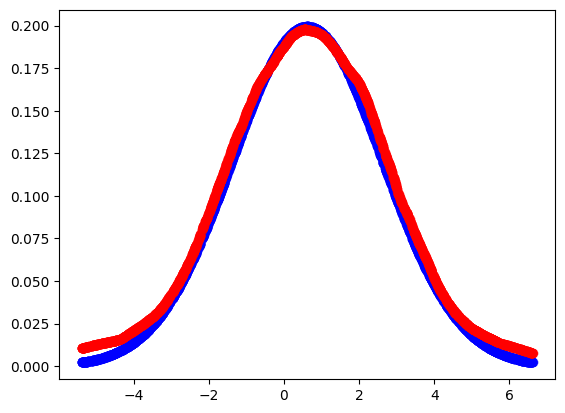

In [45]:
# Plot test data and predictions
ann.eval()

test_input = torch.tensor(test_df["Series1"].values).unsqueeze(1).float().to(device)
test_labels = torch.tensor(test_df["Label"].values).to(device)

test_predictions = ann(test_input).squeeze().detach().cpu().numpy()

plt.scatter(test_df["Series1"], test_df["Label"], color='blue', alpha=0.7, label='Test Data')

plt.scatter(test_df["Series1"], test_predictions, color='red', alpha=0.7, label='Predictions')

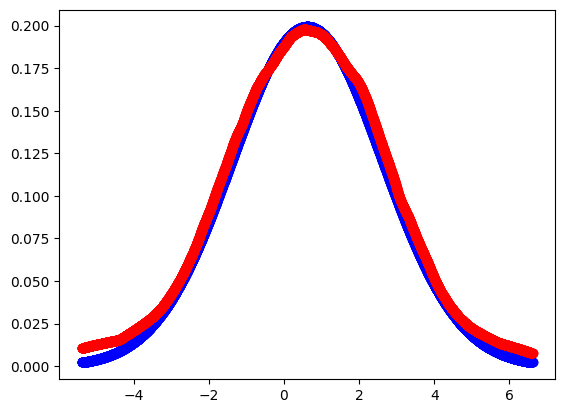

In [46]:
# Plot test data and predictions
ann.eval()

train_input = torch.tensor(train_df["Series1"].values).unsqueeze(1).float().to(device)
train_labels = torch.tensor(train_df["Label"].values).to(device)

train_predictions = ann(train_input).squeeze().detach().cpu().numpy()

plt.scatter(train_df["Series1"], train_df["Label"], color='blue', alpha=0.7, label='Train Data')

plt.scatter(train_df["Series1"], train_predictions, color='red', alpha=0.7, label='Predictions')